#### In the next notebook, we will 
1. Perform data cleaning operations on selected datasets
2. Visualize the overall time series data
3. Use seasonal decomposition methods to extract the trend and seasonality from the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
plt.style.use(style='seaborn')

#### Import air quality data into current workspace, for selected pollutant and state

In [2]:
selected_pollutant='CO'
selected_state='Florida'

In [3]:
years=os.listdir(f'DataAQ/{selected_pollutant}-{selected_state}')
years=[int(y.split('-')[-1]) for y in years]
years.sort()
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [4]:
d=pd.DataFrame({})
for year in years:
    if len(d)==0:
        d=pd.read_csv(f'DataAQ/{selected_pollutant}-{selected_state}/{selected_pollutant}-{selected_state}-{year}')
    else:
        d=pd.concat([d,pd.read_csv(f'DataAQ/{selected_pollutant}-{selected_state}/{selected_pollutant}-{selected_state}-{year}')],axis=0)
print(d.shape)

(299869, 20)


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299869 entries, 0 to 2260
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               299869 non-null  object 
 1   Source                             299869 non-null  object 
 2   Site ID                            299869 non-null  int64  
 3   POC                                299869 non-null  int64  
 4   Daily Max 8-hour CO Concentration  299869 non-null  float64
 5   UNITS                              299869 non-null  object 
 6   DAILY_AQI_VALUE                    299869 non-null  int64  
 7   Site Name                          154888 non-null  object 
 8   DAILY_OBS_COUNT                    299869 non-null  int64  
 9   PERCENT_COMPLETE                   299869 non-null  float64
 10  AQS_PARAMETER_CODE                 299869 non-null  int64  
 11  AQS_PARAMETER_DESC                 299869

In [6]:
d["Date"]=pd.to_datetime(d["Date"])
d.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 299869 entries, 0 to 2260
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
299869 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 MB


In [7]:
d.head()

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1980-01-01,AQS,120110002,1,0.9,ppm,10,NaN,19,79.0,42101,Carbon monoxide,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.086477,-80.202825
1,1980-01-02,AQS,120110002,1,1.1,ppm,13,NaN,24,100.0,42101,Carbon monoxide,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.086477,-80.202825
2,1980-01-03,AQS,120110002,1,4.9,ppm,55,NaN,24,100.0,42101,Carbon monoxide,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.086477,-80.202825
3,1980-01-04,AQS,120110002,1,7.9,ppm,85,NaN,24,100.0,42101,Carbon monoxide,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.086477,-80.202825
4,1980-01-05,AQS,120110002,1,3.8,ppm,43,NaN,24,100.0,42101,Carbon monoxide,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.086477,-80.202825


#### Identify site with most number of data points, which will be used later for time series analysis

In [8]:
print(d["Site Name"].value_counts().head())
site_name=d["Site Name"].value_counts().index[0]
site_count=d["Site Name"].value_counts()[0]

print(f'\nSite with most number of data points is {site_name} with {site_count} data points')

Lab Annex               13921
Rosselle                13257
Southside Playground    13137
WINTER PARK             12710
Azalea Park             10030
Name: Site Name, dtype: int64

Site with most number of data points is Lab Annex with 13921 data points


In [9]:
d=d[d['Site Name']==site_name]

#### Remove columns having unique values for all entries

In [10]:
print(f"Before: d.shape={d.shape}")
d=d.loc[:,d.nunique()>1]
d=d.reset_index(drop=True)
print(f"After: d.shape={d.shape}")

d.head()

Before: d.shape=(13921, 20)
After: d.shape=(13921, 5)


,Date,Daily Max 8-hour CO Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE
0,1981-01-15,9.1,97,13,54.0
1,1981-01-16,5.1,57,24,100.0
2,1981-01-17,2.8,32,24,100.0
3,1981-01-18,0.3,3,24,100.0
4,1981-01-19,1.1,13,24,100.0


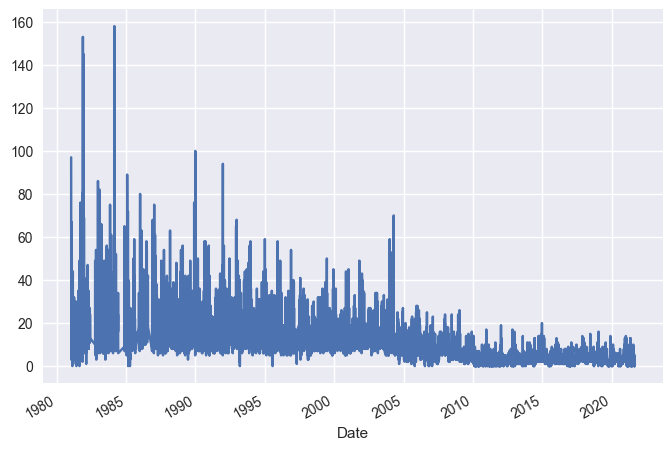

In [11]:
d=d.groupby([d['Date']]).mean()
d["DAILY_AQI_VALUE"].plot()
plt.show()


#### Select AQI metric for further analyses

In [12]:
d=d[['DAILY_AQI_VALUE']]
d.head()

,DAILY_AQI_VALUE
Date,
1981-01-15,97.0
1981-01-16,57.0
1981-01-17,32.0
1981-01-18,3.0
1981-01-19,13.0


#### Interpolate missing/NaN values in the time series using spline interpolation

In [13]:
idx = pd.date_range(min(d.index),max(d.index))
d=d.reindex(idx,fill_value=np.nan)
d['DAILY_AQI_VALUE']= d['DAILY_AQI_VALUE'].interpolate(option='spline')

In [14]:
d.shape

(14838, 1)

### <span style="color:red">For convenience, the previous data imputation operations are packaged in a single python file, with unit tests implemented to check for correctness.</span>

### UnitTest/InterpolationAQI.py contains a function called TS_imputation() which combines the prevous feature engineering operations

In [15]:
from UnitTest import InterpolationAQI

d_packaged=InterpolationAQI.TS_imputation(selected_pollutant,selected_state)
d_packaged.shape

(14838, 1)

### UnitTest/InterpolationAQI.py contains a class called TestAQIimputation() which implements the unit test.

In [17]:
current=os.getcwd()

os.chdir(os.path.expanduser('UnitTest'))

!python -m unittest InterpolationAQI.py

os.chdir(os.path.expanduser(current))


.
----------------------------------------------------------------------
Ran 1 test in 87.111s

OK


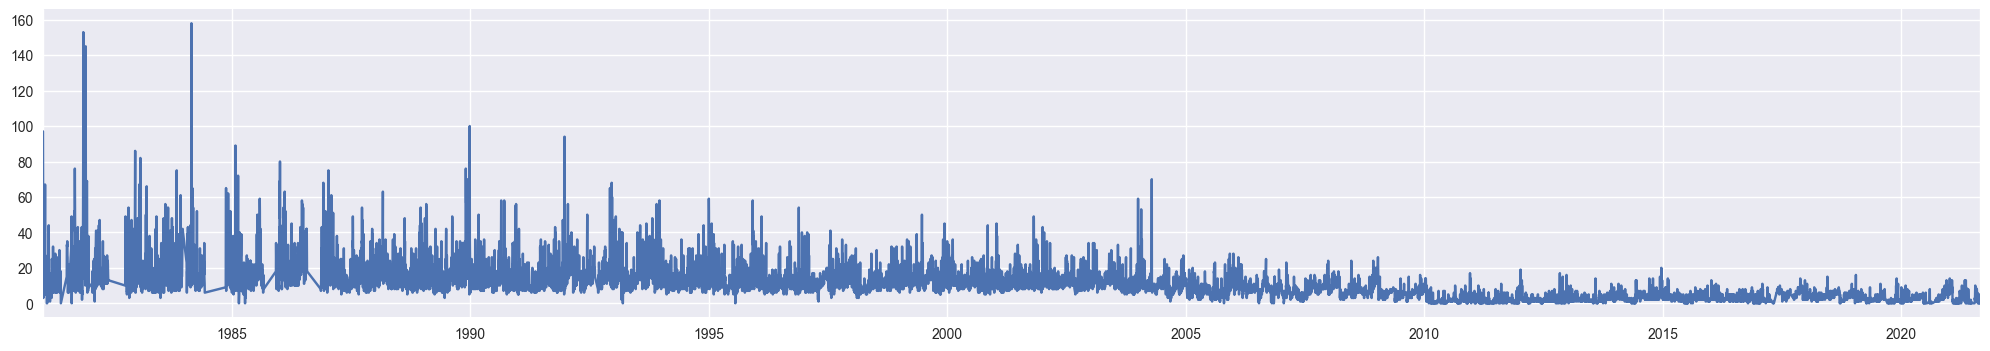

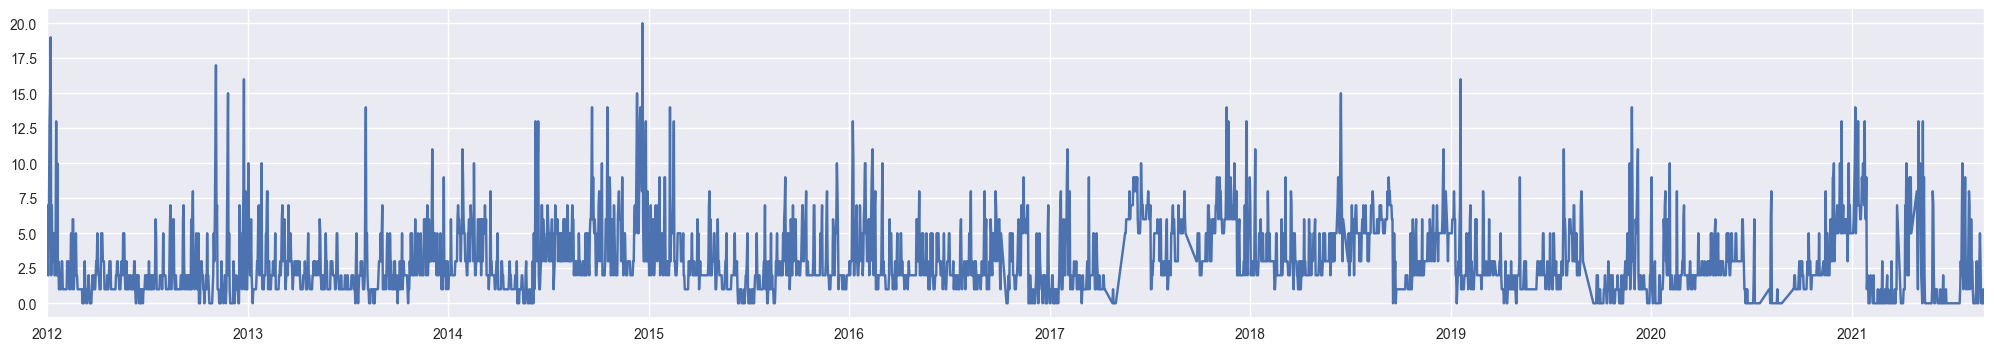

In [16]:
d.rename(columns = {'DAILY_AQI_VALUE':'AQI'}, inplace = True)
   
plt.figure(figsize=(25,4))
d['AQI'].plot()
plt.show()

plt.figure(figsize=(25,4))
d.last('10Y')['AQI'].plot()
plt.show()

In [17]:
d=d.last('10Y')

#### Dickey-Fuller test for stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(d.AQI.dropna())
print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -8.16331637164637
p-value: 9.021060058216082e-13


Null hypothesis: series is not stationary
1. If p-value > 0.05, series is stationary
2. If p-value < 0.05, series is not stationary

In [19]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

Decomposition of daily sampled AQI data

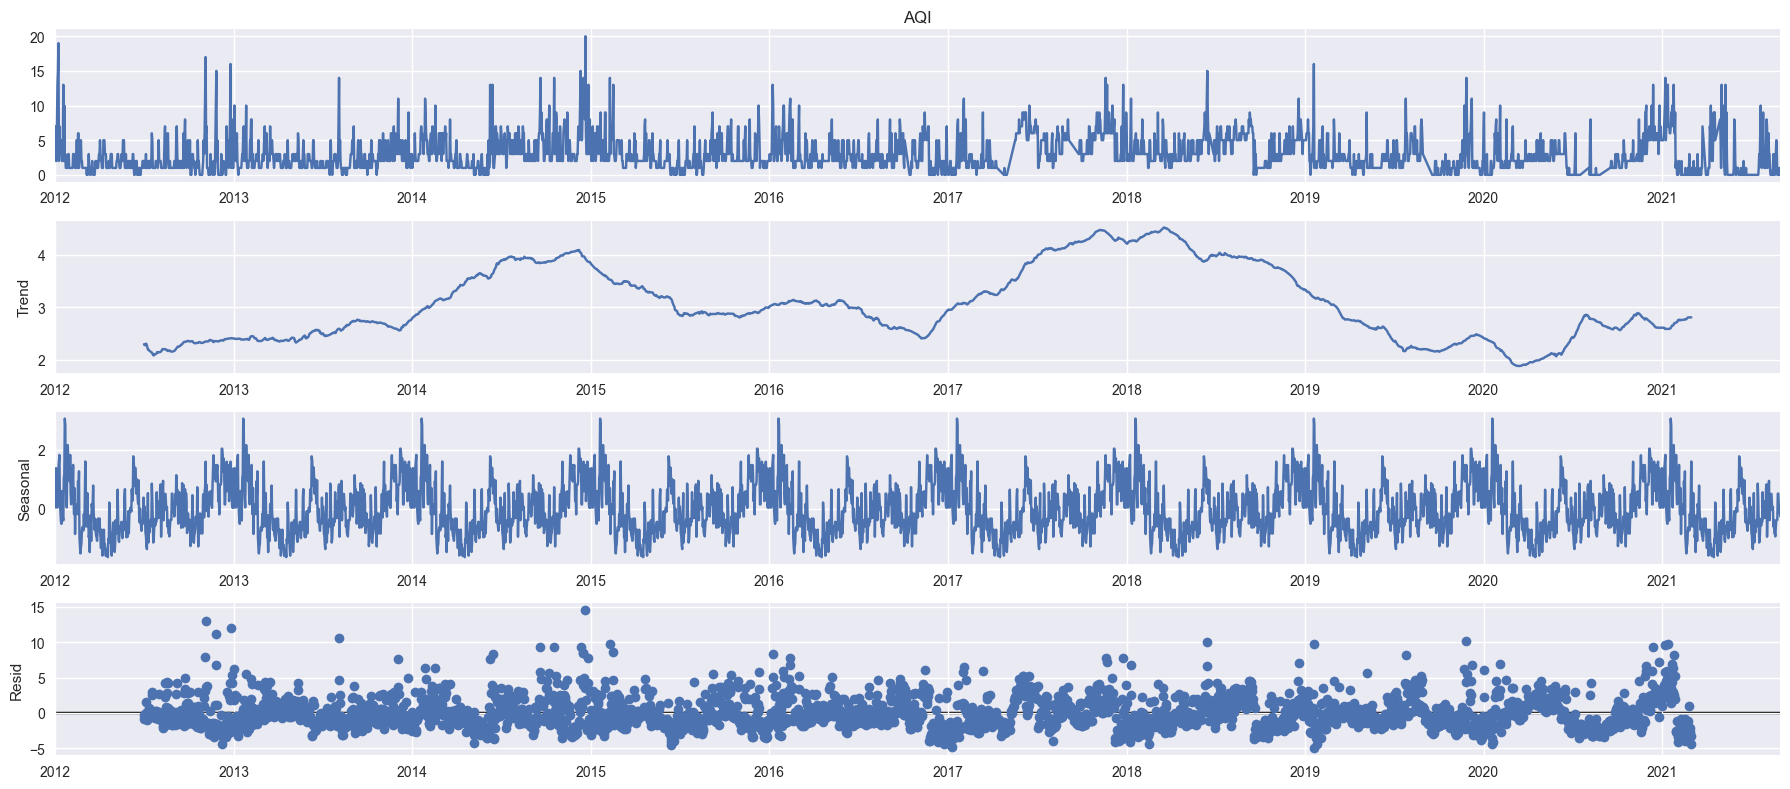

In [20]:
decomposition = sm.tsa.seasonal_decompose(d['AQI'], period=365, model='additive')
fig = decomposition.plot()
plt.show()

Decomposition of weekly sampled AQI data

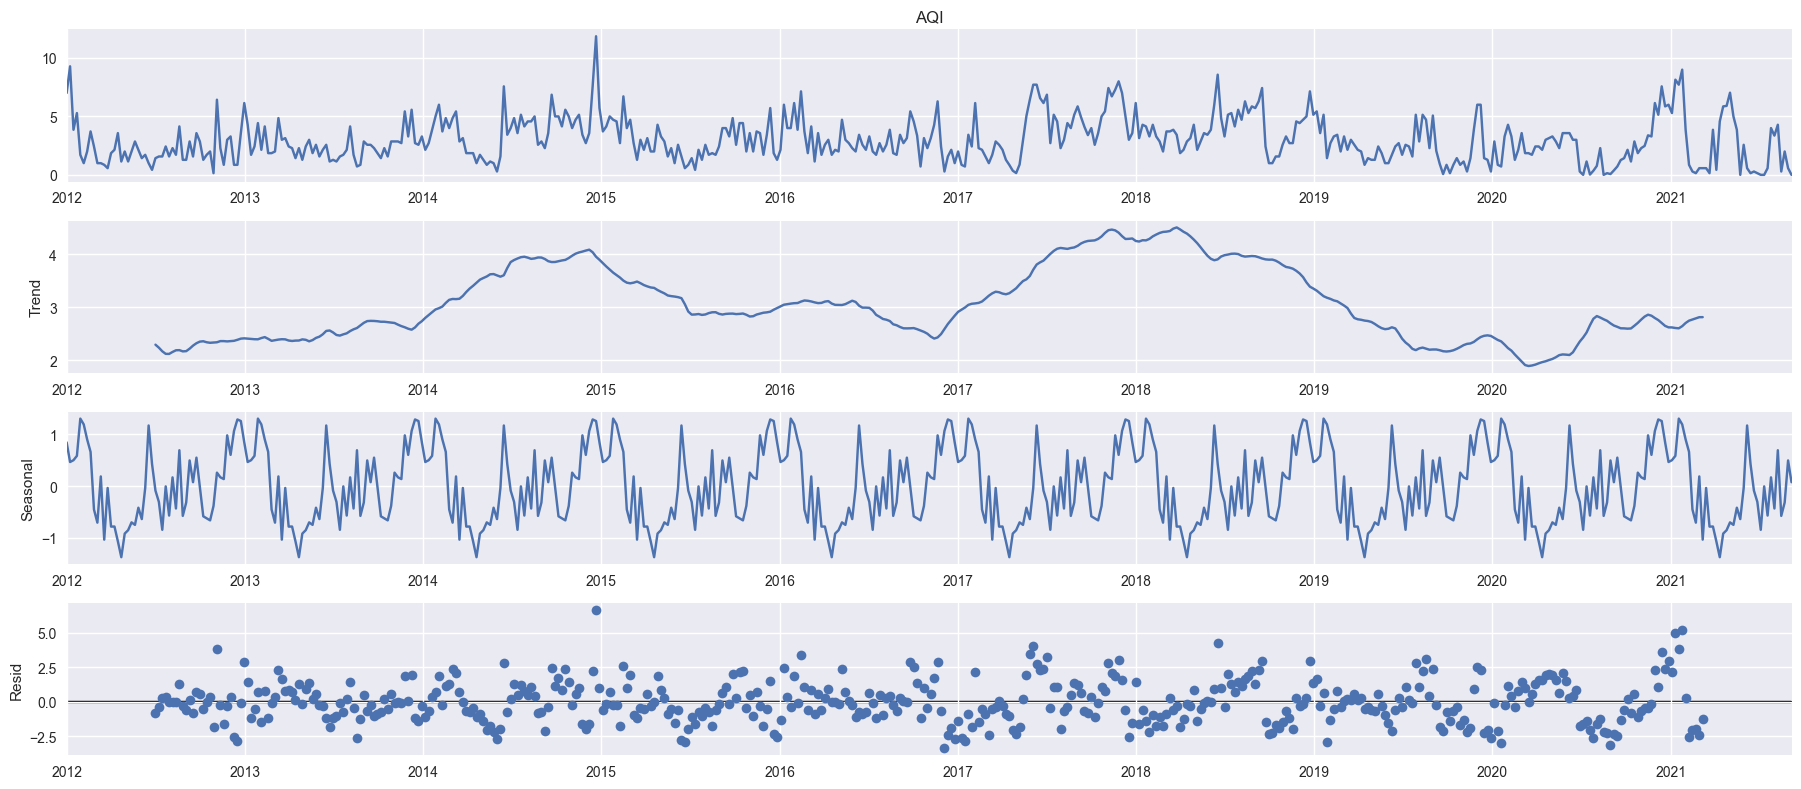

In [21]:
decomposition = sm.tsa.seasonal_decompose(d['AQI'].resample('W').mean(), period=52, model='additive')
fig = decomposition.plot()
plt.show()

Decomposition of monthly sampled AQI data

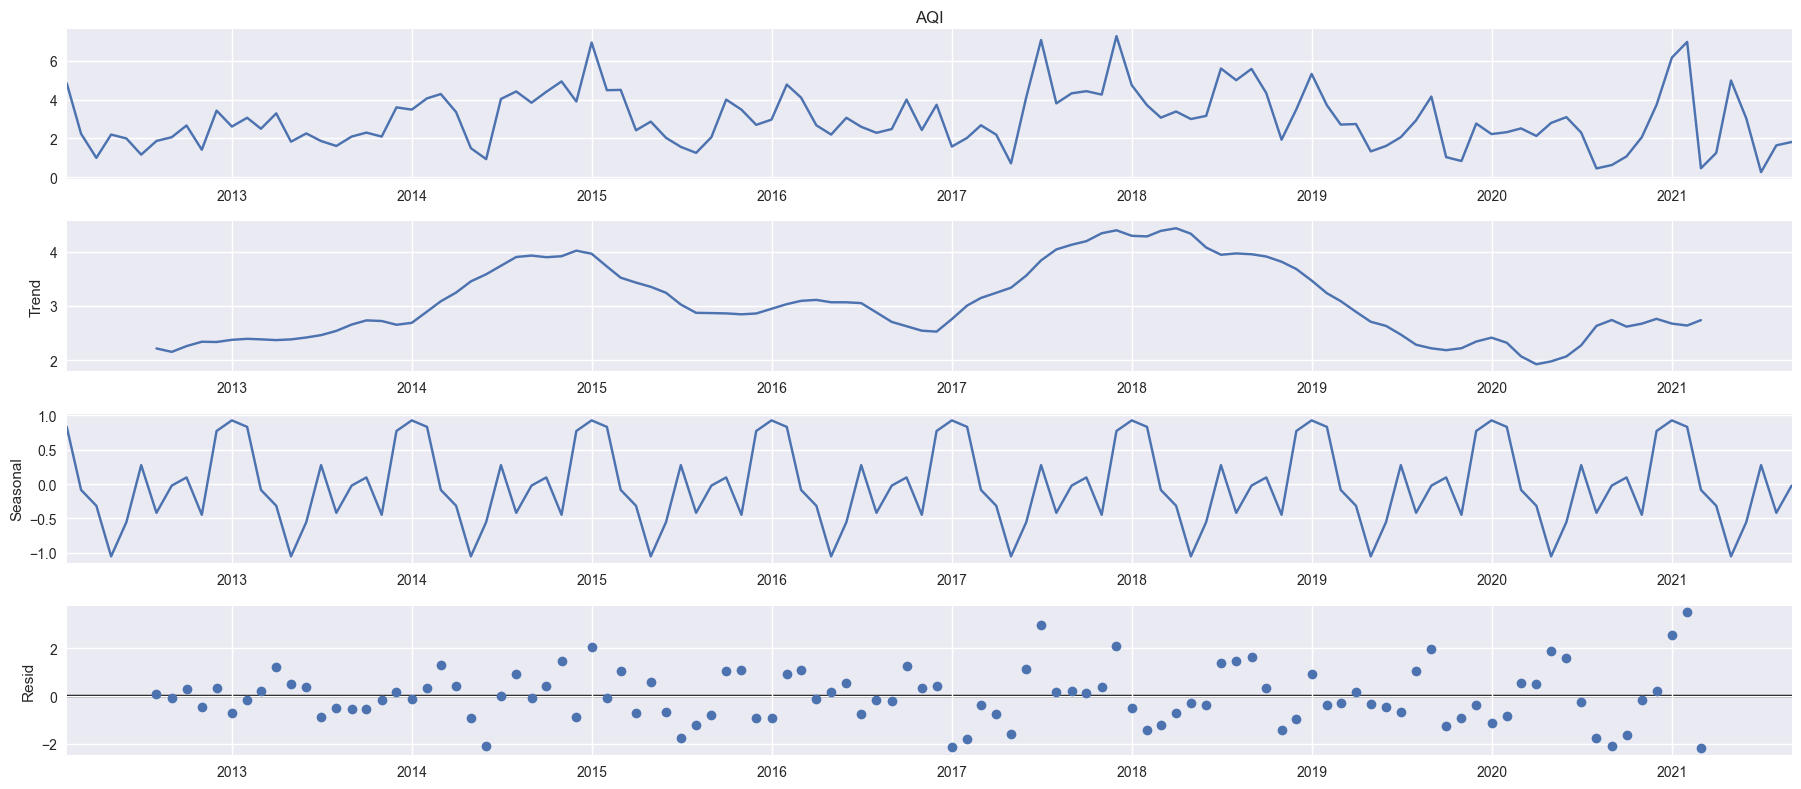

In [22]:
decomposition = sm.tsa.seasonal_decompose(d['AQI'].resample('M').mean(), period=12, model='additive')
fig = decomposition.plot()
plt.show()

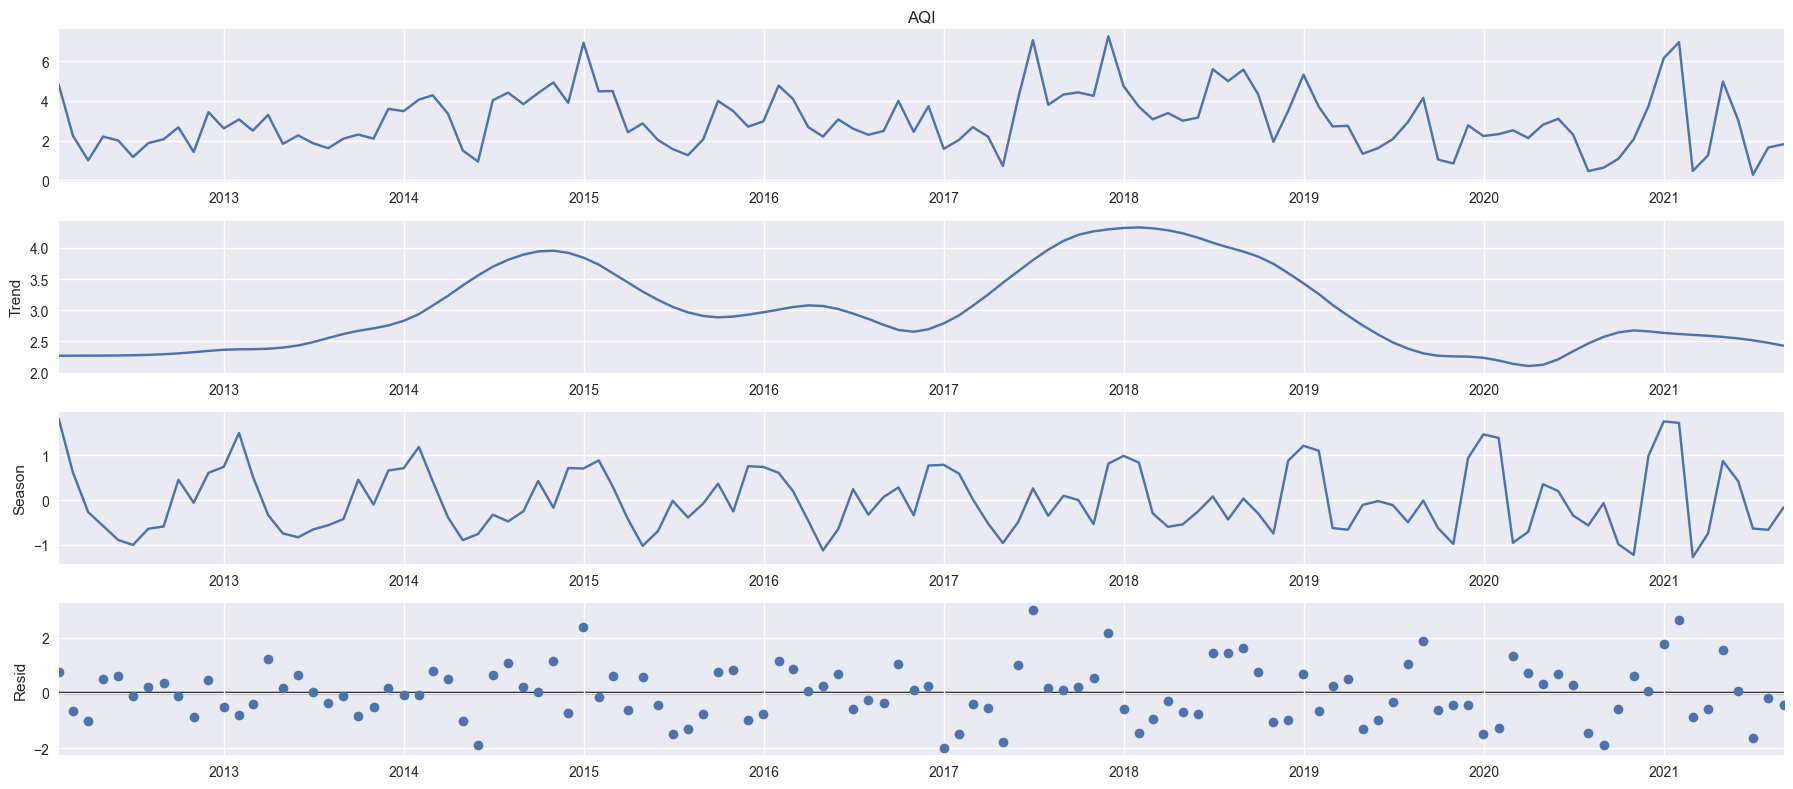

In [23]:
from statsmodels.tsa.seasonal import STL
stl = STL(d['AQI'].resample("M").mean(), seasonal=13,period=12)
res = stl.fit()
fig = res.plot()

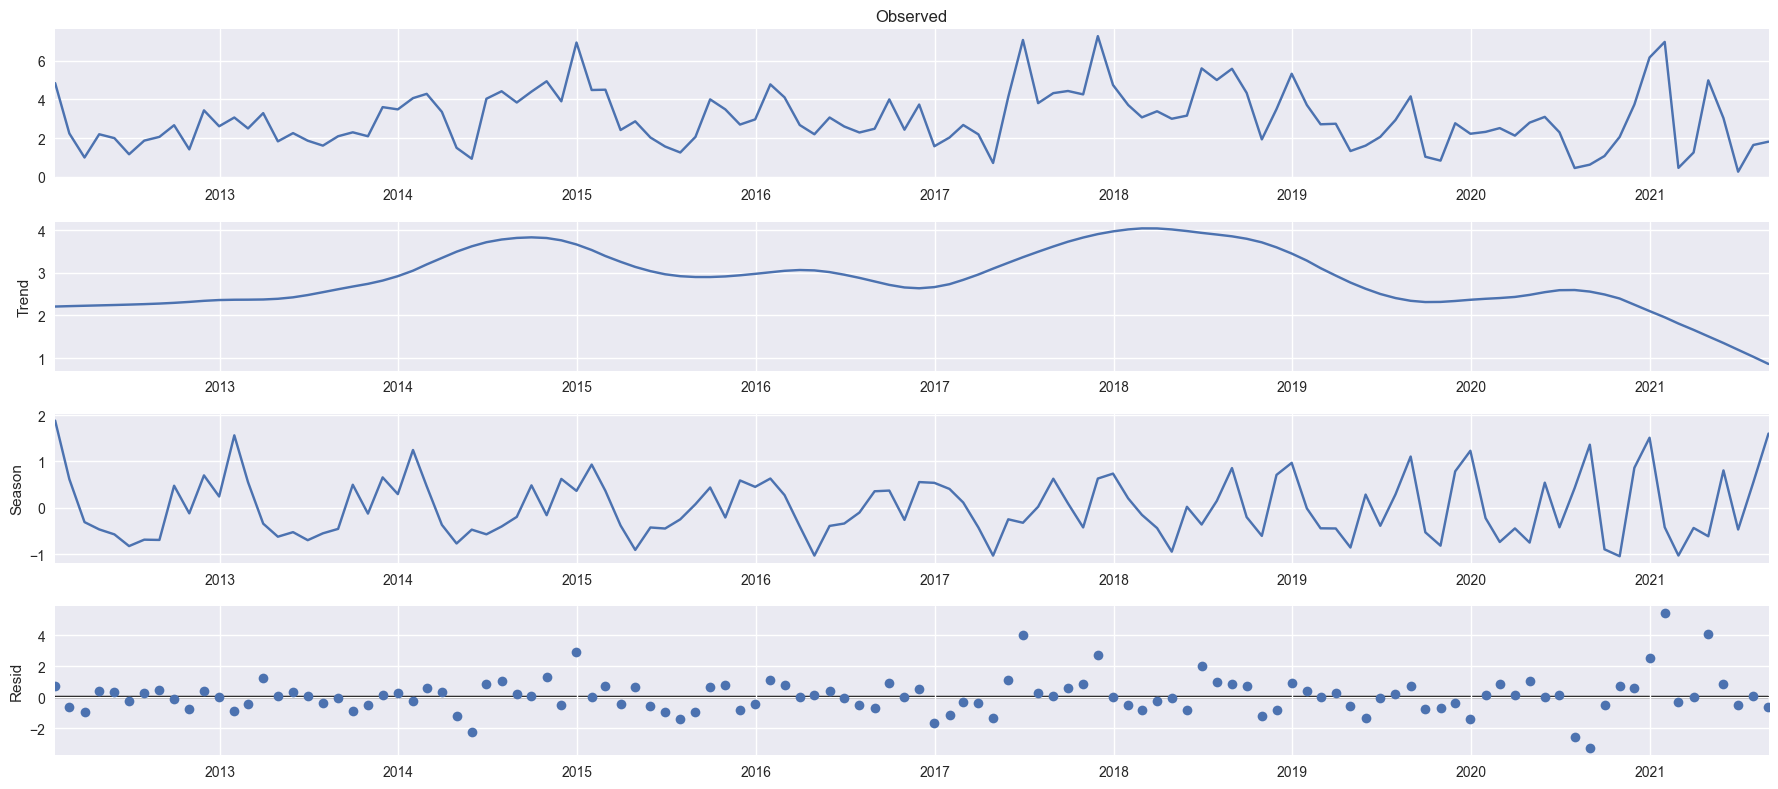

In [24]:
from statsmodels.tsa.seasonal import STL
stl = STL(d.resample("M").mean(), seasonal=13,period=12,robust=True)
res = stl.fit()
fig = res.plot()

In [44]:
d.resample('M').mean().to_csv(f'DataAQ/{selected_pollutant}-{selected_state}.csv')

#### In the next notebook, we will 
1. Use grid search to identify p,q parameters
2. Construct a SARIMA model
3. Make predictions for the AQI